**Description:** This notebook is used to play a business case based on fictional data. 

**Project Name:** Linear regression (OLS) on app data.

**Author:** Silas Mederer

**Date:** 2020-10-13

# Linear regression

**Business case:**
Congratulations, you have received your first order with an ecommerce company from New York. This company sells clothes online but also offers clothing and style advice in shops. Customers can come into the shop, consult with a stylist and then buy the clothes they want via app or website. The company is in the process of deciding whether to focus on the app or the website. Your job is to support them in this decision. Let's go!

## Dashboard and set-up

In [1]:
import pandas as pd
import numpy as np

# vizualisation
import seaborn as sns
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# warnings handler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Meta as df
def meta(df, transpose=True):
    """
    This finction returns a dataframe that lists:
    - column names
    - nulls abs
    - nulls rel
    - dtype
    - duplicates
    - number of diffrent values (nunique)
    """
    metadata = []
    dublicates = sum([])
    for elem in df.columns:

        # Counting null values and percantage
        null = df[elem].isnull().sum()
        rel_null = round(null/df.shape[0]*100, 2)
        
        # Defining the data type
        dtype = df[elem].dtype

        # Check dublicates
        duplicates = df[elem].duplicated().any()

        # Check number of nunique vales
        nuniques = df[elem].nunique()
        

        # Creating a Dict that contains all the metadata for the variable
        elem_dict = {
            'varname': elem,
            'nulls': null,
            'percent': rel_null,
            'dtype': dtype,
            'dup': duplicates,
            'nuniques': nuniques
        }
        metadata.append(elem_dict)

    meta = pd.DataFrame(metadata, columns=['varname', 'nulls', 'percent', 'dtype', 'dup', 'nuniques'])
    meta.set_index('varname', inplace=True)
    meta = meta.sort_values(by=['nulls'], ascending=False)
    if transpose:
        return meta.transpose()
    print(f"Shape: {df.shape}")

    return meta

In [3]:
# Expands the describe() function
def describe_plus(df, transpose=True):
    """
    This function returns a dataframe based on describ() function added:
    - skew()
    - kurtosis()
    - variance
    """
    import pandas as pd
    statistics = pd.DataFrame(df.describe())
    skew       = pd.Series(df.skew())
    kurtosis   = pd.Series(df.kurtosis())
    variance   = pd.Series(df.var())
                           
    statistics.loc['skew'] = skew
    statistics.loc['kurtosis'] = kurtosis
    statistics.loc['variance'] = variance

    if transpose:
        return round(statistics.transpose(), 2)
    return round(statistics, 2)

In [4]:
# Plots the train, test split.
def plot_train_test_split(y, y_train, y_test):
    """
    This function plots the the sizes of training and test set.
    """
    import matplotlib.pyplot as plt
    # plot
    y.plot.hist()
    y_train.plot.hist()
    y_test.plot.hist()
    
    # dataframe with relative and absolut values
    plt.legend(['all', 'train', 'test'])
    storage = pd.DataFrame()
    storage['train abs'] = round(y_train.value_counts(), 2)
    storage['train %']   = round((y_train.value_counts()/y_train.shape[0]), 2)
    storage['test abs']  = round(y_test.value_counts(), 2)
    storage['test %']    = round((y_test.value_counts()/y_test.shape[0]), 2)
    storage['all abs']   = round(y.value_counts(), 2)
    storage['all %']     = round((y.value_counts()/y.shape[0]), 2)
    
    # prints informations about splits
    print ("Training set has {} samples.".format(y_train.shape[0]))
    print ("Testing set has {} samples.".format(y_test.shape[0]))

## Load and check data

The data was given by the fictive company. It includes: 
* Avg. Session Length: Which is the time needed in face to face contact.
* Time on App: Average time in app.
* Time on Website: Average time on hp in minutes.
* Length of Membership: in years

In [5]:
df = pd.read_csv("data/Ecommerce Customers")

**Schaue dir den Head von customers an und wende die info() und describe() Methode an.**

In [6]:
df.head(2).round()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.0,13.0,40.0,4.0,588.0
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,32.0,11.0,37.0,3.0,392.0


In [7]:
df.tail(2).round()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.0,12.0,37.0,2.0,456.0
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,34.0,12.0,36.0,3.0,498.0


In [8]:
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [9]:
describe_plus(df)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,variance
Avg._Session_Length,500.0,33.05,0.99,29.53,32.34,33.08,33.71,36.14,-0.03,0.01,0.99
Time_on_App,500.0,12.05,0.99,8.51,11.39,11.98,12.75,15.13,-0.09,0.13,0.99
Time_on_Website,500.0,37.06,1.01,33.91,36.35,37.07,37.72,40.01,0.01,-0.10,1.02
Length_of_Membership,500.0,3.53,1.00,0.27,2.93,3.53,4.13,6.92,-0.11,0.35,1.00
Yearly_Amount_Spent,500.0,499.31,79.31,256.67,445.04,498.89,549.31,765.52,0.03,0.46,6290.83


In [10]:
meta(df, transpose=False)

Shape: (500, 8)


,nulls,percent,dtype,dup,nuniques
varname,,,,,
Email,0,0.0,object,False,500
Address,0,0.0,object,False,500
Avatar,0,0.0,object,True,138
Avg._Session_Length,0,0.0,float64,False,500
Time_on_App,0,0.0,float64,False,500
Time_on_Website,0,0.0,float64,False,500
Length_of_Membership,0,0.0,float64,False,500
Yearly_Amount_Spent,0,0.0,float64,False,500


In [11]:
df.drop(columns=["Email", "Address", "Avatar"], 
        inplace=True,
        axis=1)
df.head(3).T

,0,1,2
Avg._Session_Length,34.497268,31.926272,33.000915
Time_on_App,12.655651,11.109461,11.330278
Time_on_Website,39.577668,37.268959,37.110597
Length_of_Membership,4.082621,2.664034,4.104543
Yearly_Amount_Spent,587.951054,392.204933,487.547505


**Conclusions:** The dataframe contains 500 entries and has eight columns. All columns are filled with values five of them numeric and three with objects. The only cleaning was renameing the columns. For the analysis the features "Email", "Address"and "Avatar" has been droped.

## EDA

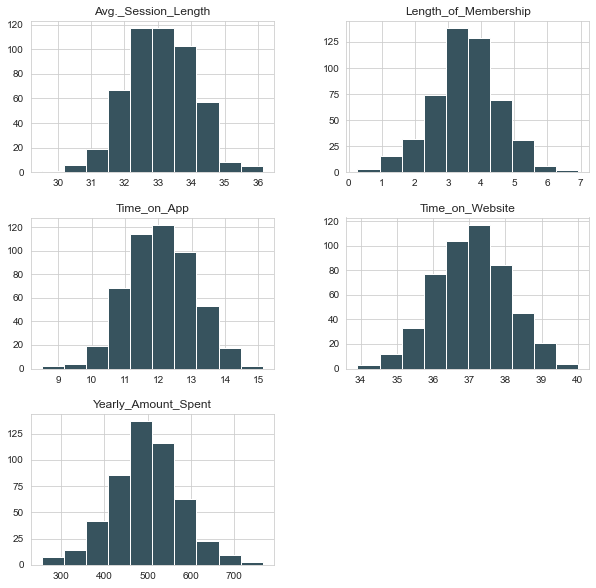

In [12]:
# first we check the feature distribution (only numeric features)

_ = df.hist(figsize=(10,10))
plt.savefig('figures/hist.png')

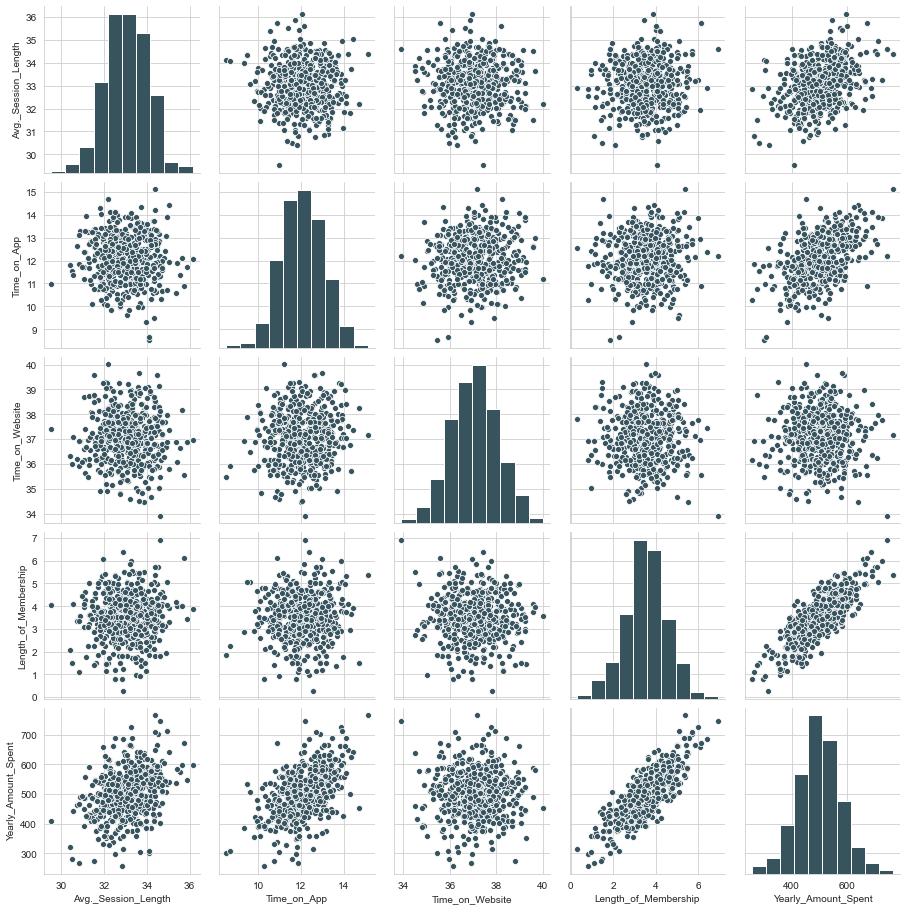

In [13]:
sns.pairplot(data=df)
plt.savefig('figures/pairplot.png')

**Observations:** 
- It seems that "Yearly_Amount_Spent" correlates slightly with "Time_on_App", but more with "Length_of_Membership". 
- It is plotted in the lmplot below the correlation table.
- The hex plot shows an accumulation in the middle, so the between eleven and 13 minutes on the app and about three to four years membership.

In [14]:
round(df.corr(),2)

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg._Session_Length,1.00,-0.03,-0.03,0.06,0.36
Time_on_App,-0.03,1.00,0.08,0.03,0.50
Time_on_Website,-0.03,0.08,1.00,-0.05,-0.00
Length_of_Membership,0.06,0.03,-0.05,1.00,0.81
Yearly_Amount_Spent,0.36,0.50,-0.00,0.81,1.00


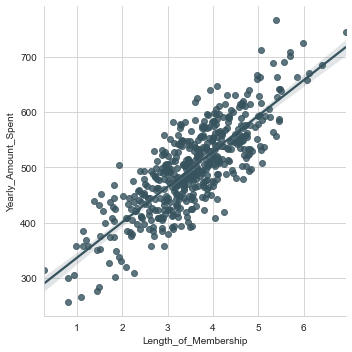

In [15]:
# proof the observation

sns.lmplot(x="Length_of_Membership", y="Yearly_Amount_Spent", data=df)

**Observation:** We can see a positive corellation between "Length_of_Membership" and "Yearly_Amount_Spent".

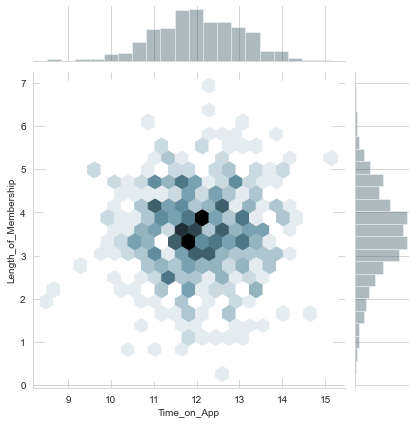

In [16]:
sns.jointplot(x="Time_on_App", y="Length_of_Membership", data=df, kind="hex")

**Observation:** The Hexplot shows a concentration in the middle, so "Time_in_App" is in mean around 12 min, "Length_of_Membership"between 3 and 4 years.

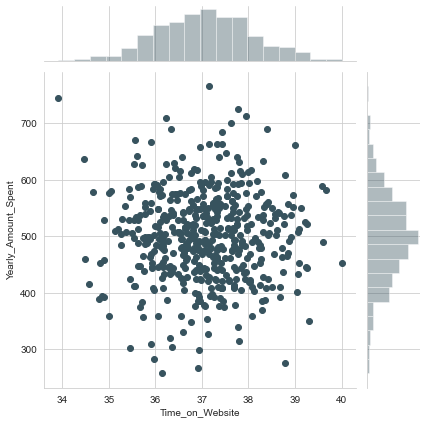

In [17]:
# check for relations - website

sns.jointplot(x="Time_on_Website", 
              y="Yearly_Amount_Spent", 
              data=df)

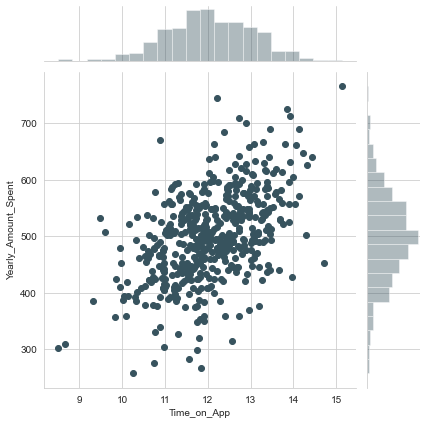

In [18]:
# check for relations - app

sns.jointplot(x="Time_on_App", 
              y="Yearly_Amount_Spent", 
              data=df)

**Observation:** The jointplots ("Yearly_Amount_Spent" & "Time_on_Website") doesn't show any correleation. On the other plot we can see a positiv increasing relation between the "Time_on_App" and the "Yearly_Amount_Spent".

## Train Test Split

As we saw in the plot before there is a relation between the two, so we can use a linear regression to predict.

In [19]:
y = df["Yearly_Amount_Spent"]
X = df.drop("Yearly_Amount_Spent", axis=1)
X.columns

Index(['Avg._Session_Length', 'Time_on_App', 'Time_on_Website',
       'Length_of_Membership'],
      dtype='object')

Training set has 350 samples.
Testing set has 150 samples.


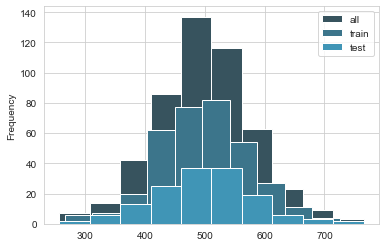

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# plot
plot_train_test_split(y, y_train, y_test)

## Linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

# train on train data
lr.fit(X_train, y_train)
print("Coefficents: \n", lr.coef_)

Coefficents: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


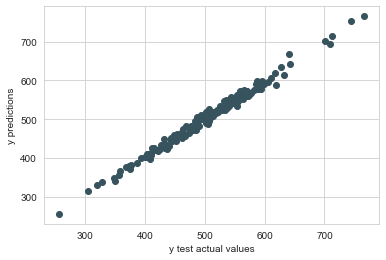

In [23]:
# save
predictions = lr.predict(X_test)

# plot
plt.scatter(y_test, predictions)
plt.xlabel("y test actual values")
plt.ylabel("y predictions")
plt.savefig('figures/regression_predictions.png')

## Model evaluation

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [25]:
print(f"R2:   {round(r2_score(y_test, predictions)*100,3)}%")
print(f"RMSE:  {round(mean_squared_error(y_test, predictions)**0.5,3)}")
print(f"Explained variance score:  {round(explained_variance_score(y_test, predictions)*100,3)}%")

R2:   98.9%
RMSE:  8.934
Explained variance score:  98.908%


- **R2:** What we can see is that the proportion of the variance in the dependent variable (label = "Yearly_Amount_Spent") that is predictable from the independent variables (features = 'Avg._Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership') lies by 98,9%. Keep in mind that our data is fictional, usually this score shouldn´t lie above 95% if so the model is overfitted or the data is biased.
- **RMSE:** It indicates by how much, on average, the estimate deviates from the measurement. The RMSE should always be considered in conjunction with the data itself. So you can find a plot of the risiduen in the plots below. The root mean squared error (RMSE) should be as low as possible the optimum is 0 but this is as a high R2 not usual in real world data.
- **Explained variance score:** Higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions.

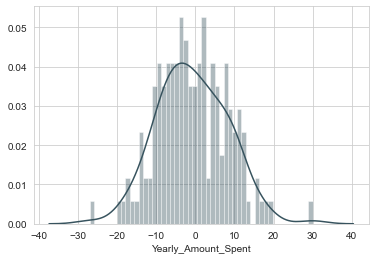

In [26]:
# resiuals plot

sns.distplot(y_test-predictions, bins=50);
plt.savefig('figures/residual_hist.png')

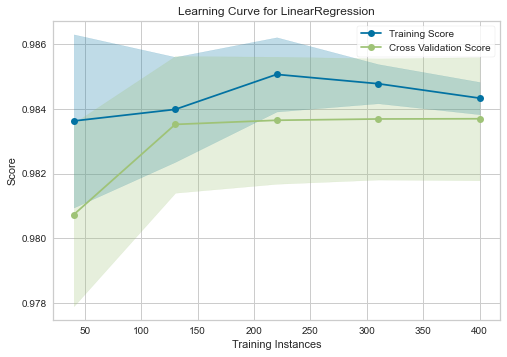

In [27]:
from yellowbrick.model_selection import LearningCurve

model = LinearRegression()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)
visualizer.show();

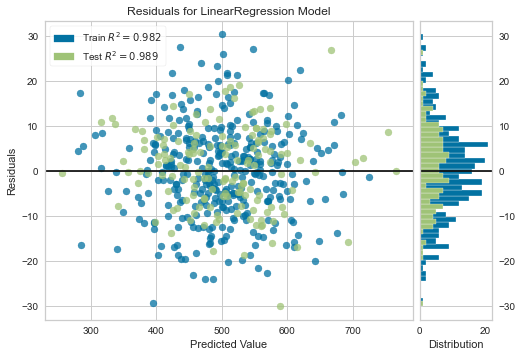

In [28]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [30]:
# also an OLS but from a diffrent modul, you can find the coefficents listet and the r2 score top left
import statsmodels.api as sms
X_train = sms.add_constant(X_train)

model = sms.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     4641.
Date:                 Wed, 14 Oct 2020   Prob (F-statistic):          1.88e-298
Time:                         08:47:42   Log-Likelihood:                -1314.1
No. Observations:                  350   AIC:                             2638.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1047.9328     28.509    -36.758      0.000   -1104.007    -991.859
Avg._Session_Length     25.9815      0.557     46.657      0.000      24.886      27.077
Time_on_App             38.5902      0.590     65.411      0.000      37.430      39.751
Time_on_Website          0.1904      0.576      0.330      0.741      -0.943       1.324
Length_of_Membership    61.2791      0.568    107.923      0.000      60.162      62.396
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.505
Skew:                          -0.092   Prob(JB):                        0.777
Kurtosis:                       2.977   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Recommendations

In [29]:
co = pd.DataFrame(lr.coef_, X.columns)
co.columns = ["Coefficents"]
co.round(2)

,Coefficents
Avg._Session_Length,25.98
Time_on_App,38.59
Time_on_Website,0.19
Length_of_Membership,61.28


Interpretation of the coefficients: 
- If all other values remain constant, an increase in "Avg._Session_Length" of 1 unit will result in an increase of 28.98 Dollar
- With "Time_on_App" the "Yearly_Amount_Spent" even increases by 38.59 Dollar
- The highest increase in value is for "Length_of_Membership".
- With "Time_on_Website" the increase of 1 unit only brings about 20ct.

**There are two possible recommendations:**
- You need to relaunch your website to increase turnover.
- Or down the homepage.
- As it is now it has low impact.